<!-- Title -->
<h1 align="center">
  Digital Epidemiology Project
</h1>

<!-- Subtitle -->
<h2 align="center">
   Data-Driven Stochastic Hybrid Model
</h2>

## User

In [1]:
#@everywhere user="PietroMonticone1";
#user="PietroMonticone2";
#user="DavideOrsenigo";
#interrupt()

## Modules

In [3]:
# Parallel Computation
using Distributed
addprocs(1);
###interrupt()

In [4]:
@everywhere user="PietroMonticone1";
#user="PietroMonticone2";
#user="DavideOrsenigo";

In [5]:
# Data Management 
@everywhere using DataFrames, DataFramesMeta, DrWatson, Queryverse, NPZ
# Statistics
@everywhere using StatsBase, Distributions, Random
# Graphs 
@everywhere using LightGraphs, SimpleWeightedGraphs, MetaGraphs, GraphIO, GraphPlot
# Modelling
@everywhere using Agents
# Numerical Computation 
@everywhere using LinearAlgebra, StaticArrays
# Visualization
@everywhere using Plots, AgentsPlots, PlotThemes, Images, ImageIO
# Custom Module
if user == "PietroMonticone1"
    @everywhere Epi = include("/Users/Pit/GitHub/DigitalEpidemiologyProject/Notebooks/Modelling/Julia/MetapopABM/DigitalEpidemiology.jl")
elseif user == "PietroMonticone2"
    @everywhere Epi = include("/Users/pietromonticone/github/DigitalEpidemiologyProject/Notebooks/Modelling/Julia/MetapopABM/DigitalEpidemiology.jl")
elseif user == "DavideOrsenigo"
    @everywhere Epi = include(raw"C:\Users\Utente\Desktop\Progetti\GitHub\DigitalEpidemiologyProject\Notebooks\Modelling\Julia\MetapopABM\DigitalEpidemiology.jl");
end

## Data

### Geospatial

In [6]:
# Load fine-grained geospatial images
###a=Epi.LoadImage("Airports", user);
###as=Epi.LoadImage("Airports+Stations", user);
###asr=Epi.LoadImage("Airports+Stations+Railways", user);
###asrr=Epi.LoadImage("Airports+Stations+Railways+Roads", user);
###asrrb=Epi.LoadImage("Airports+Stations+Railways+Roads+Built1", user);
###asrrbb=Epi.LoadImage("Airports+Stations+Railways+Roads+Built1+Built2", user);
###[a as asr asrr asrrb asrrbb]

### Administrative 

In [7]:
#Load multi-scale administrative maps
###regions=Epi.LoadImage("Regions", user);
###provinces=Epi.LoadImage("Provinces", user);
###municipalities=Epi.LoadImage("Municipalities", user);
###[regions provinces municipalities]

In [8]:
# Load multi-layer administrative proximity graph image 
###proximity_multiplex_graph = Epi.LoadImage("AdministrativeProximityMultiplexGraph", user) 

### Population

In [9]:
# Load population data
@everywhere population_data = Epi.LoadData("ProvincialPopulation", user);
# Load age-stratified population data
@everywhere age_population_data = Epi.LoadData("AgeStratifiedProvincialPopulation", user); 
# Load population pyramid image 
###population_age_structure = Epi.LoadImage("AgeStructure", user) 

### Contact

In [10]:
# Load contact data for all locations
@everywhere all_contact_data=Epi.LoadData("AllEdgeList", user)
# Build contact graph for all locations
@everywhere all_contact_graph=SimpleWeightedDiGraph(all_contact_data[1].+1, all_contact_data[2].+1, all_contact_data[3]);
# Load contact matrix plot for all locations
###all_contact_image=Epi.LoadImage("All", user)

# Load contact data for home
@everywhere home_contact_data=Epi.LoadData("HomeEdgeList", user)
# Build contact graph for home
@everywhere home_contact_graph=SimpleWeightedDiGraph(home_contact_data[1].+1, home_contact_data[2].+1, home_contact_data[3]);
# Load contact matrix plot for home
###home_contact_image=Epi.LoadImage("Home", user)

# Load contact data for work
@everywhere work_contact_data=Epi.LoadData("WorkEdgeList", user)
# Build contact graph for work
@everywhere work_contact_graph=SimpleWeightedDiGraph(work_contact_data[1].+1, work_contact_data[2].+1, work_contact_data[3]);
# Load contact matrix plot for work
###work_contact_image=Epi.LoadImage("Work", user)

# Load contact data for school
@everywhere school_contact_data=Epi.LoadData("SchoolEdgeList", user)
# Build contact graph for school
@everywhere school_contact_graph=SimpleWeightedDiGraph(school_contact_data[1].+1, school_contact_data[2].+1, school_contact_data[3]);
# Load contact matrix plot for school
###school_contact_image=Epi.LoadImage("School", user)

# Load contact data for other locations
@everywhere other_contact_data=Epi.LoadData("OtherEdgeList", user)
# Build contact graph for other locations
@everywhere other_contact_graph=SimpleWeightedDiGraph(other_contact_data[1].+1, other_contact_data[2].+1, other_contact_data[3]);
# Load contact matrix plot for other locations
###other_contact_image=Epi.LoadImage("Other", user)

###[home_contact_image work_contact_image school_contact_image other_contact_image]

### Mobility

In [11]:
# Load mobility data
@everywhere mobility_data_phase1 = Epi.LoadData("Flow1", user)
@everywhere mobility_data_phase2 = Epi.LoadData("Flow2", user)
@everywhere mobility_data_phase3 = Epi.LoadData("Flow3", user)
@everywhere mobility_data_phase4 = Epi.LoadData("Flow4", user)
# Build mobility graphs 
@everywhere mobility_graph_phase1 = SimpleWeightedDiGraph(mobility_data_phase1[1], mobility_data_phase1[2], mobility_data_phase1[3])
@everywhere mobility_graph_phase2 = SimpleWeightedDiGraph(mobility_data_phase2[1], mobility_data_phase2[2], mobility_data_phase2[3])
@everywhere mobility_graph_phase3 = SimpleWeightedDiGraph(mobility_data_phase3[1], mobility_data_phase3[2], mobility_data_phase3[3])
@everywhere mobility_graph_phase4 = SimpleWeightedDiGraph(mobility_data_phase4[1], mobility_data_phase4[2], mobility_data_phase4[3])
# Build initial mobility graph
@everywhere mobility_graph = SimpleWeightedDiGraph(mobility_data_phase1[1], mobility_data_phase1[2], mobility_data_phase1[3])
# Remove the 104/5/6/7th node: provincial code doesn't exist
for i in 1:4
    rem_vertex!(mobility_graph_phase1, 104)
    rem_vertex!(mobility_graph_phase2, 104)
    rem_vertex!(mobility_graph_phase3, 104)
    rem_vertex!(mobility_graph_phase4, 104)
    rem_vertex!(mobility_graph, 104)
end
# Load mobility images
###mobility_phase1_image = Epi.LoadImage("Phase1", user)	
###mobility_phase2_image = Epi.LoadImage("Phase2", user)
###mobility_phase3_image = Epi.LoadImage("Phase3", user)
###mobility_phase4_image = Epi.LoadImage("Phase4", user)
#Display mobility images
###[mobility_phase1_image mobility_phase2_image mobility_phase3_image mobility_phase4_image]

### Epidemiological

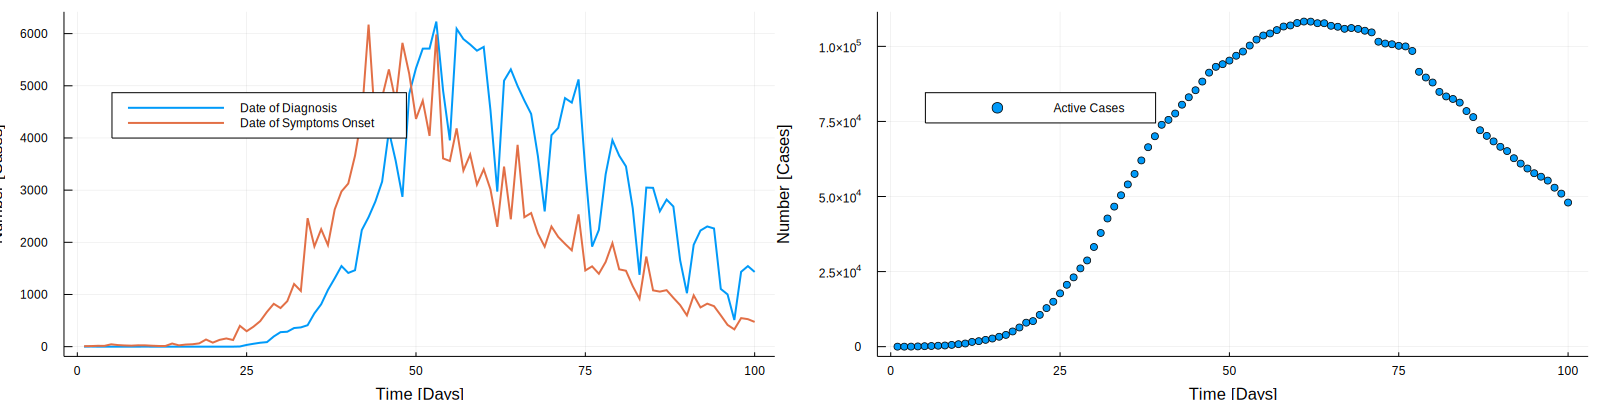

In [12]:
# Load data on confirmed COVID-19 active cases
@everywhere active_cases=Epi.LoadData("Active", user) 
# Load data on confirmed cumulative COVID-19 cases 
@everywhere cumulative_cases=Epi.LoadData("Deaths", user) 
# Extract confirmed cumulative COVID-19 deaths 
@everywhere cumulative_deaths=cumulative_cases["Deaths"]
# Load data on confirmed COVID-19 cases by date of diagnosis and symptoms onset
@everywhere symptoms_diagnosis_cases=Epi.LoadData("SymptomsDiagnosis", user)
# Load data on COVID-19 tests and tested patients
@everywhere tests = Epi.LoadData("Tests", user).DailyTestsWeeklyAverage

# Plot time series of confirmed COVID-19 cases by date of diagnosis vs. symptoms onset
plot_cases=plot(1:100,symptoms_diagnosis_cases["Diagnosis"][1:100],
                label="Date of Diagnosis",
                xlab="Time [Days]",
                ylabel="Number [Cases]",
                #title="COVID-19 Confirmed Cases in Italy", 
                legend=:topleft,
                lw=2)
            plot!(plot_cases,1:100,symptoms_diagnosis_cases["Symptoms"][1:100],
                 label="Date of Symptoms Onset",
                 lw=2);
# Plot time series confirmed confirmed COVID-19 active cases 
plot_active=plot(1:100,active_cases["Active Cases"][1:100],
    label="Active Cases",
    xlab="Time [Days]",
    ylabel="Number [Cases]",
    #title="COVID-19 Confirmed Cases in Italy", 
    legend=:topleft,
    lw=2,
    seriestype=:scatter);
# Display time series 
plot(plot_cases, plot_active, layout=2, size=(1600,400))

## Agent Type

In [13]:
# Patient Definition
@everywhere mutable struct Patient <: AbstractAgent
    id::Int                   # identity code ∈ ℕ               
    pos::Int                  # location node ∈ ℕ 
    age_group::Int            # age group ∈ [1,16] ⊂ ℕ
    residence::Int            # residence node ∈ ℕ 
    work_pos::Int             # workplace node ∈ ℕ 
    household::Array          # household community
    workplace::Array          # workplace community
    status::Symbol            # infection status ∈ {S,E,I_a,I_p,I_s,H,ICU,R,D}
    diagnosis::Symbol         # ∈ {O,N,P,W,R} 
    status_delay_left::Int    # delay counter for infection status
    diagnosis_delay_left::Int # delay counter for diagnosis 
    contact_tracing_app::Bool # Download: {True, False}
end;

    #prescription::Symbol # ∈ {O, Q, ICU}
    #serological
    #contact-tracing
    #fear, risk aversion -> individual-based social distancing 

## Dynamics

In [14]:
@everywhere function model_step!(model)
    # Initialize geospatial 2-array
    ###model.geo=[]
    # Initialize contact-tracing array
    ###model.contact_tracing_array=[]
    # Increment clock
    model.t+=1
    # Select testing strategy
	### Epi.test!(model,"base_passive_random_uniform_national")
	### Epi.test!(model,"passive_random_uniform_national")
	### Epi.test!(model,"passive_random_uniform_provincial") #ONLY FOR LARGE N
	Epi.test!(model,"passive_biased_symptoms_national")
	### Epi.test!(model,"passive_biased_symptoms_provincial")
    # Select mobility phase
	if model.t≤11 
		Epi.phase1!(model)
	elseif model.t≤11+22
		Epi.phase2!(model)
    elseif model.t>11+22 #model.t≤11+22+65
		Epi.phase3!(model)
    #else
	#	Epi.phase4!(model) #elseif model.t≤11+22+65+28
	end
    # Update geospatial 2-array
    ###for prov in 1:model.M 
    ###    append!(model.geo, length([agent.id for agent in get_node_agents(prov, model) if agent.status !=:S && agent.status !=:R && agent.status !=:D])) #length([agent.id for agent in get_node_agents(prov, model) if agent.status !=:S && agent.status !=:R && agent.status !=:D])
    ###end
    model.agents_at_home=[]
    # Mobility dynamics 
    for agent in allagents(model)
        Epi.move_back_home!(agent, model)
        if agent.pos==agent.residence
            append!(model.agents_at_home, agent.id)
        end
         if agent.diagnosis !=:P && agent.diagnosis !=:W
            # Mobility dynamics
            if rand() ≤ (1-2/7) && agent.work_pos != 0
                agent.pos = agent.work_pos
                if agent.id in model.agents_at_home
                    deleteat!(model.agents_at_home, findfirst(isequal(agent.id), model.agents_at_home))
                end
            else
                Epi.migrate!(agent, model)  
            end
        end
    end
end;

@everywhere function agent_step!(agent, model)
    # Remove died patients
	agent.status==:D && return
    # Exposure at home
    if length(agent.household)>0  
        home_contacted_agents=Epi.contact!(agent, model, "home")
        ###for contacted_agent in home_contacted_agents
        ###    if contacted_agent.contact_tracing_app==true && agent.contact_tracing_app==true
        ###        add_edge!(contact_tracing_graph, contacted_agent.id, agent.id, LightGraphs.weights(contact_tracing_graph)[contacted_agent.id,agent.id]+1)
        ###        push!(model.contact_tracing_array, (contacted_agent.id, agent.id))
        ###    end
        ###end
        Epi.get_exposed!(agent, model, home_contacted_agents)
    end
    
    # Isolation Condition
    if agent.diagnosis !=:P && agent.diagnosis !=:W
        # Exposure at work
        if length(agent.workplace)>0 
            work_contacted_agents=Epi.contact!(agent, model,"work") 
            ###for contacted_agent in work_contacted_agents
            ###    if contacted_agent.contact_tracing_app==true && agent.contact_tracing_app==true
            ###        add_edge!(contact_tracing_graph, contacted_agent.id, agent.id, LightGraphs.weights(contact_tracing_graph)[contacted_agent.id,agent.id]+1)
            ###        push!(model.contact_tracing_array, (contacted_agent.id, agent.id))
            ###    end
            ###end
            Epi.get_exposed!(agent, model, work_contacted_agents)    
        end  
        # Exposure at school
        if model.phase != 3 
            school_contacted_agents=Epi.contact!(agent, model,"school")
            ###for contacted_agent in school_contacted_agents
            ###    if contacted_agent.contact_tracing_app==true && agent.contact_tracing_app==true
            ###        add_edge!(contact_tracing_graph, contacted_agent.id, agent.id, LightGraphs.weights(contact_tracing_graph)[contacted_agent.id,agent.id]+1)
            ###        push!(model.contact_tracing_array, (contacted_agent.id, agent.id))
            ###    end
            ###end
            Epi.get_exposed!(agent, model, school_contacted_agents) 
        end
        # Exposure at other locations
        other_contacted_agents=Epi.contact!(agent, model,"other") 
        for contacted_agent in other_contacted_agents
            ###if contacted_agent.contact_tracing_app==true && agent.contact_tracing_app==true
            ###    add_edge!(contact_tracing_graph, contacted_agent.id, agent.id, LightGraphs.weights(contact_tracing_graph)[contacted_agent.id,agent.id]+1)
            ###    push!(model.contact_tracing_array, (contacted_agent.id, agent.id))
            ###end
        end
        Epi.get_exposed!(agent, model, other_contacted_agents) 
    end
    
    # Infection dynamics
    Epi.get_infected!(agent, model) 
    # Symptoms onset
    Epi.get_symptoms!(agent, model)       
    # Recovery dynamics
    Epi.recover_or_die!(agent, model)           
    
    # Delays update 
	if agent.status_delay_left>0
        agent.status_delay_left-=1
	end
    if agent.diagnosis_delay_left>0
		agent.diagnosis_delay_left-=1
	end
end;

## Parameters

In [15]:
# Time 
@everywhere δt=1
@everywhere nsteps=100 # max 233 (length(capacity_array))
@everywhere tf=nsteps*δt
@everywhere t=0:δt:tf;

In [16]:
# Population
@everywhere scale_factor=20000
@everywhere provincial_pops=round.(Int, population_data.population./scale_factor) 
@everywhere age_provincial_pops=round.(Int, age_population_data./scale_factor) 
@everywhere N = sum(Array(age_provincial_pops))  # number of agents
@everywhere M = length(provincial_pops)          # number of provincial subpopulations
@everywhere K = length(age_provincial_pops[1])   # number of age groups (16)

#=@everywhere parameters = Dict(
    :t => 0,
    :capacity_array => capacity_array,
    :provincial_pops => provincial_pops,
    :age_provincial_pops => age_provincial_pops,
    :home_contact_graph => home_contact_graph,
    :work_contact_graph => work_contact_graph,
    :school_contact_graph => school_contact_graph,
    :other_contact_graph => other_contact_graph,
    :mobility_graph => mobility_graph,
    :mobility_graph_phase1 => mobility_graph_phase1,
    :mobility_graph_phase2 => mobility_graph_phase2,
    :mobility_graph_phase3 => mobility_graph_phase3,
    :mobility_graph_phase4 => mobility_graph_phase4,
    :h => [0, 0.2, 0.4, 0.6, 0.8, 1],
    :I0 => I0,
    :geo => geo )=#

In [17]:
# Migration rates
@everywhere h=0.8 #home

# Initial conditions
@everywhere I0=1 # round(Int, N/2000)

# Health system
###@everywhere capacity=round(Int, N*1*10^(-3)); # Total tests in phase 2 and 3 
@everywhere tests[1:6] = fill(tests[7],6)
@everywhere capacity_array = round.(Int, vcat(zeros(38), tests./scale_factor))

# Contact-tracing coverage
@everywhere contact_tracing_coverage = 1 # PARAMSCAN
# Initialize contact-tracing graph
@everywhere contact_tracing_graph = SimpleWeightedDiGraph(N)

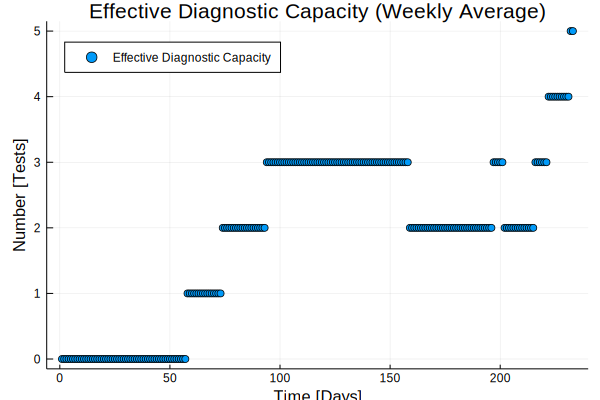

In [18]:
plot(1:length(capacity_array),capacity_array,
                label="Effective Diagnostic Capacity",
                xlab="Time [Days]",
                ylabel="Number [Tests]",
                title="Effective Diagnostic Capacity (Weekly Average)", 
                legend=:topleft,
                seriestype = :scatter)

## Modelling Framework

### Epidemic Module

In [19]:
# Load images of the compartmental epidemic model diagrams 
###epidemic_model_diagram = Epi.LoadImage("EpidemicModelDiagram", user) 

### Surveillance Module

In [20]:
# Load images of the compartmental surveillance/diagnostic model diagrams 
###surveillance_model_diagram= Epi.LoadImage("SurveillanceModelDiagram", user) 

### Behavioral Module

In [21]:
# Load images of the compartmental behavioral model diagrams 

### Initialization 

In [37]:
# Model initialization 
@everywhere function InitializeModel(t::Int, capacity_array::Array{Int,1}, provincial_pops::Array{Int,1}, age_provincial_pops::DataFrame, 
		home_contact_graph::SimpleWeightedDiGraph{Int64,Float64}, work_contact_graph::SimpleWeightedDiGraph{Int64,Float64}, school_contact_graph::SimpleWeightedDiGraph{Int64,Float64}, other_contact_graph::SimpleWeightedDiGraph{Int64,Float64}, contact_tracing_graph::SimpleWeightedDiGraph{Int64,Float64},
		mobility_graph::SimpleWeightedDiGraph{Int64,Float64}, mobility_graph_phase1::SimpleWeightedDiGraph{Int64,Float64},mobility_graph_phase2::SimpleWeightedDiGraph{Int64,Float64},mobility_graph_phase3::SimpleWeightedDiGraph{Int64,Float64},mobility_graph_phase4::SimpleWeightedDiGraph{Int64,Float64},
		h::Real,I0::Int, contact_tracing_coverage::Real)
	
	# Set populations
	N = sum(Array(age_provincial_pops))  # number of agents
	M = length(provincial_pops)          # number of subpopulations
	K = length(age_provincial_pops[1])   # number of age groups (16)
    ###R = length(keys(regions))
	# Initialize id 
	id = 0    
	# Initialize Phase 
	phase = 1
    # Initialize Geospatial
    geo = []
    # Initialize Contact-Tracing array
    contact_tracing_array=[]
    # Initialize list of agents @ home
    agents_at_home=[]
    
	# Define the dictionary of model properties
	properties = @dict(t, phase, capacity_array,
		home_contact_graph, work_contact_graph, school_contact_graph, other_contact_graph,
		mobility_graph, mobility_graph_phase1,mobility_graph_phase2,mobility_graph_phase3,mobility_graph_phase4,
		provincial_pops, age_provincial_pops,
		h, I0, geo, contact_tracing_array,agents_at_home,
		N, M, K) #, R

	# Instantiate graph ambient space
	space = GraphSpace(mobility_graph) 
	# Instatiate model
	model = ABM(Patient, space; properties = properties)

	# Populate the model
	for province ∈ 1:M
		for age ∈ 1:K 
			for n ∈ 1:age_provincial_pops[province][age]
				id+=1
				residence=province
                work_pos=0
				household=[]
                workplace=[]
				pos=residence
				age_group=age
				status=:S
				diagnosis=:O
				status_delay_left=-1
                diagnosis_delay_left=-1
                contact_tracing_app=false
				add_agent!(pos, model, age_group, residence, work_pos, household, workplace, status, diagnosis, status_delay_left, diagnosis_delay_left, contact_tracing_app)
			end
		end
	end
    
    # Create a list of all agents
    agents = [agent for agent in allagents(model)]
    
    # Fake migration
    for agent in agents
        Epi.migrate!(agent, model)
    end
        
    #Initialize households & workplaces
    for agent in agents
        Epi.InitializeHousehold(agent, model)
        Epi.InitializeWorkplace(agent, model)
        ###if rand() ≤ contact_tracing_coverage
        ###    agent.contact_tracing_app = true
        ###end
    end
    
    # End fake migration
    for agent in agents
        agent.pos=agent.residence
    end
    
    # Initialize infected agents 
    codogno_agents = get_node_agents(98,model)
	for agent in StatsBase.sample(codogno_agents, I0)
		agent.status = :E
		agent.status_delay_left = round(Int, rand(Gamma(3,4)))
    end
    roma_agents = get_node_agents(58,model)
    for agent in StatsBase.sample(roma_agents, I0)
		agent.status = :E
		agent.status_delay_left = round(Int, rand(Gamma(3,4)))
    end
	
	return model
end;

### Simulations 

In [38]:
# Seed Selection
#@everywhere Random.seed!(1234);
# Initialize the model
@everywhere model = InitializeModel(0, capacity_array,
    # Population 
	provincial_pops, age_provincial_pops,
    # Contact  
	home_contact_graph, work_contact_graph, school_contact_graph, other_contact_graph, contact_tracing_graph,
    # Mobility  
	mobility_graph, mobility_graph_phase1, mobility_graph_phase2, mobility_graph_phase3, mobility_graph_phase4,
    # Free parameters
	h, I0, contact_tracing_coverage)

# Initialize workplace
###agents = [agent for agent in allagents(model)]
##for agent in agents 
##    InitializeWorkplace(agent, model)
##end

# Surveillance 
@everywhere susceptible(status) = count(i == :S for i in status)
@everywhere exposed(status) = count(i == :E for i in status)
@everywhere infected_presymptomatic(status) = count(i == :I_p for i in status)
@everywhere infected_symptomatic(status) = count(i == :I_s for i in status)
@everywhere infected_asymptomatic(status) = count(i == :I_a for i in status)
@everywhere infected(status) =exposed(status)+infected_asymptomatic(status)+infected_presymptomatic(status)+infected_symptomatic(status)
# @everywhere active(diagnosis) = count(i == :P for i in diagnosis);

@everywhere recovered(status) = count(i == :R for i in status)
@everywhere dead(status) = count(i == :D for i in status);
###total_tests = nsteps * capacity
###daily_tests = capacity
@everywhere tested(diagnosis) = count(i != :O for i in diagnosis);
#daily_tested(diagnosis)= count
@everywhere positive(diagnosis) = count(i == :P for i in diagnosis); # active
@everywhere positive_rate(diagnosis)=positive(diagnosis)/(tested(diagnosis)+0.01)
#positive_rate(diagnosis)=positive(diagnosis)/capacity # new_positives/cpacity or #positives/ || "daily tests" != "daily tested people"
@everywhere infected_rate(status) = infected(status) / model.N

# Data Collection
@everywhere to_collect = 
    [(:status, susceptible),(:status, exposed),(:status, infected_presymptomatic),(:status, infected_symptomatic),(:status, infected_asymptomatic),
     (:status, infected),(:status, recovered),(:status, dead),(:status, infected_rate),
	 (:diagnosis, tested),(:diagnosis, positive),(:diagnosis, positive_rate)]

###agent_data, model_data = @time run!(model, agent_step!, model_step!, nsteps, agents_first=false; 
###                  adata = to_collect, mdata=[:geo, :contact_tracing_array],replicates=1, parallel=false); 

agent_data, _ = @time run!(model, agent_step!, model_step!, nsteps, agents_first=false; 
                                     adata = to_collect,replicates=1, parallel=false); 

302.510175 seconds (3.79 G allocations: 69.906 GiB, 7.49% gc time)


In [39]:
#@time open("contact_tracing_array.txt","w") do io
#   println(io,model_data.contact_tracing_array)
#end

In [40]:
#savegraph("cumulative_contact_tracing_graph.graphml", contact_tracing_graph, GraphMLFormat())

In [41]:
###model_geo_data = DataFrame(model_data.geo[2:nsteps])
agent_data |> save("/Users/Pit/GitHub/DigitalEpidemiologyProject/Notebooks/Modelling/Julia/MetapopABM/Output/agent_data_p_s_100_20000_5.csv")
###model_geo_data |> save("model_geo_data.csv")

### Parameter Sensitivity Analysis 

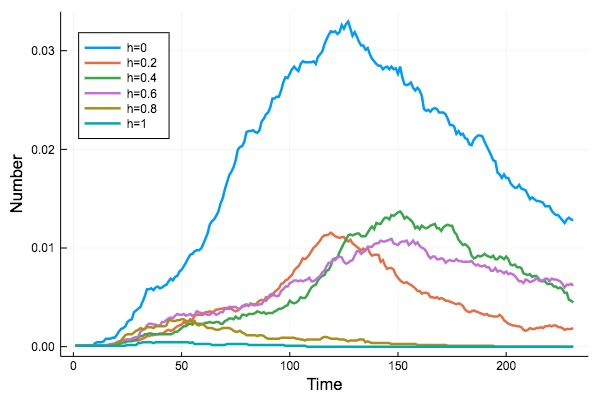

In [27]:
parameter_sensitivity_home_rate = load("/Users/Pit/GitHub/DigitalEpidemiologyProject/Notebooks/Modelling/Julia/MetapopABM/ParameterSensitivityHomeRate.jpeg")

In [28]:
##########################
######## FUNCTION ########
##########################
#=@everywhere function ParameterSensitivity(model, parameters::Dict, replicates::Int)
    nvalues= sum( [ length(parameters[key]) for key in keys(parameters) if isa(parameters[key], Array)] )
    agent_data = fill( DataFrame(), nvalues )
    model_data = fill( DataFrame(), nvalues )
    i=1
    
    for key in keys(parameters)
        
        for parameter_value in parameters[key]
            model = InitializeModel(0, capacity_array,
            # Population 
            provincial_pops, age_provincial_pops,
            # Contact  
            home_contact_graph, work_contact_graph, school_contact_graph, other_contact_graph,
            # Mobility  
            mobility_graph,mobility_graph_phase1, mobility_graph_phase2, mobility_graph_phase3, mobility_graph_phase4,
            # Free parameters
            h, I0,
            # Geospatial 
            geo)
            
            agent_data[i], model_data[i] = @time run!(model, agent_step!, model_step!, nsteps, agents_first=false; 
                  adata = to_collect, mdata=[:geo],replicates=replicates, parallel=false);
        end
        
    end
    
    i+=1   
end

##########################
##### VISUALIZATION ######
##########################

ParameterSensitivity(model, parameters, replicates=1)

gd1=groupby(agent_data[1], [:step])
gd2=groupby(agent_data[2], [:step])
gd3=groupby(agent_data[3], [:step])
gd4=groupby(agent_data[4], [:step])
gd5=groupby(agent_data[5], [:step])
gd6=groupby(agent_data[6], [:step])

# Apply translation
ac = vcat(fill(0,32), active_cases["Active Cases"]);

timestep = 1:length(gd1)

g1 = [gd1[i].infected_status for i in timestep]
g2 = [gd2[i].infected_status for i in timestep]
g3 = [gd3[i].infected_status for i in timestep]
g4 = [gd4[i].infected_status for i in timestep]
g5 = [gd5[i].infected_status for i in timestep]
g6 = [gd6[i].infected_status for i in timestep]

g1=[(g1...)...] 
g2=[(g2...)...] 
g3=[(g3...)...] 
g4=[(g4...)...] 
g5=[(g5...)...] 
g6=[(g6...)...] 

plot(timestep, g1,
	label="h=0",
	xlab="Time",
	ylabel="Number",
	#title="DC=$capacity | Chi²=$Χ",
    size=(1000,1000),
	legend=:topleft,
	lw=2.5)
plot!(timestep, g2,lw=2.5, label="h=0.2")
plot!(timestep, g3,lw=2.5, label="h=0.4")
plot!(timestep, g4,lw=2.5, label="h=0.6")
plot!(timestep, g5,lw=2.5, label="h=0.8")
plot!(timestep, g6,lw=2.5, label="h=1")
plot!(timestep, ac/(scale_factor/10),
	  label="Active Cases",
	  lw=2.5)=#

## Visualizations

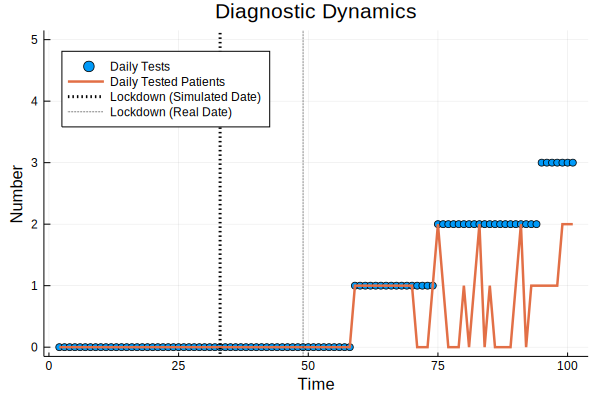

In [42]:
gd = groupby(agent_data, [:step])

timestep = 2:length(gd)
total_capacity = sum(capacity_array)

ft=[quantile(gd[i].tested_diagnosis-gd[i-1].tested_diagnosis,0.05) for i in timestep]
mt=[quantile(gd[i].tested_diagnosis-gd[i-1].tested_diagnosis,0.5) for i in timestep]
nt=[quantile(gd[i].tested_diagnosis-gd[i-1].tested_diagnosis,0.95) for i in timestep]

plot(timestep, capacity_array[1:end],
      label="Daily Tests",
      seriestype = :scatter)
plot!(timestep, mt,
    title="Diagnostic Dynamics",
	label="Daily Tested Patients",
	xlab="Time",
	ylabel="Number",
	legend=:topleft,
	lw=2.5; 
	ribbon=[mt-ft,nt-mt],
    fillalpha=0.3)
vline!(timestep, [22+11], line=(:dot,3), color="black", label="Lockdown (Simulated Date)")
vline!(timestep, [22+11+16], line=(:dot,1), color="black", label="Lockdown (Real Date)")

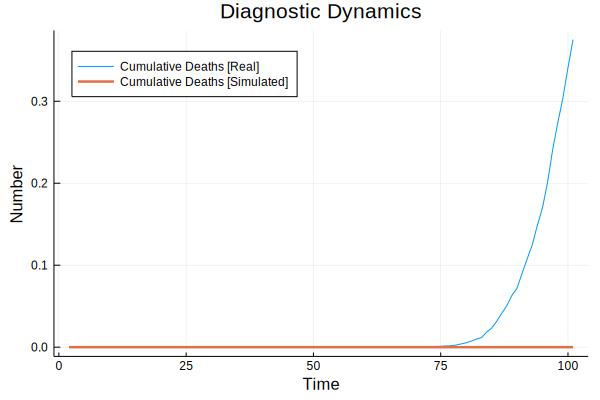

In [43]:
# Apply translation
cumulative_deaths = vcat(fill(0,32), cumulative_deaths)

fd=[quantile(gd[i].dead_status,0.05) for i in timestep]
md=[quantile(gd[i].dead_status,0.5) for i in timestep]
nd=[quantile(gd[i].dead_status,0.95) for i in timestep]

plot(timestep, cumulative_deaths[1:nsteps]/scale_factor,
      label="Cumulative Deaths [Real]")
plot!(timestep, md,
    title="Diagnostic Dynamics",
    label="Cumulative Deaths [Simulated]",
	xlab="Time",
	ylabel="Number",
	legend=:topleft,
	lw=2.5; 
	ribbon=[md-fd,nd-md],
    fillalpha=0.3)

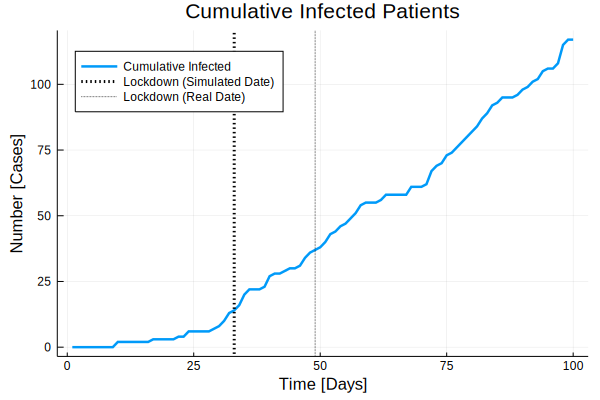

In [44]:
cumulative_infected=[gd[i].infected_presymptomatic_status.+gd[i].infected_symptomatic_status.+gd[i].infected_asymptomatic_status.+gd[i].recovered_status.+gd[i].dead_status for i in timestep]

fc=[quantile(cumulative_infected[i], 0.05) for i in 1:length(cumulative_infected)]
mc=[quantile(cumulative_infected[i], 0.5) for i in 1:length(cumulative_infected)]
nc=[quantile(cumulative_infected[i], 0.95) for i in 1:length(cumulative_infected)]

plot(1:length(mc), mc,
	label="Cumulative Infected",
	xlab="Time [Days]",
	ylabel="Number [Cases]",
	title="Cumulative Infected Patients", 
	legend=:topleft,
	lw=2.5; 
	ribbon=[mc-fc,nc-mc],
    fillalpha=0.3)
vline!(timestep, [22+11], line=(:dot,3), color="black", label="Lockdown (Simulated Date)")
vline!(timestep, [22+11+16], line=(:dot,1), color="black", label="Lockdown (Real Date)")

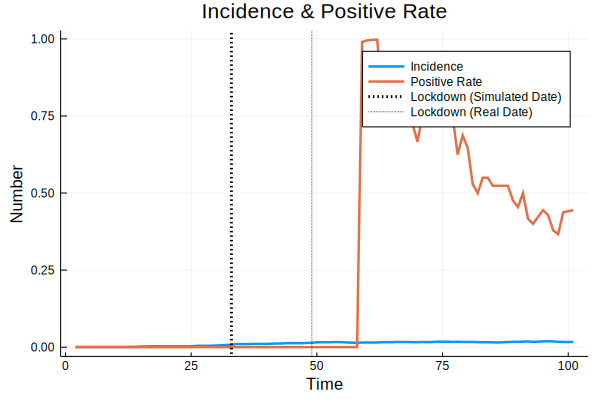

In [45]:
f1=[quantile(gd[i].infected_rate_status,0.05) for i in timestep]
m1=[quantile(gd[i].infected_rate_status,0.5) for i in timestep] 
n1=[quantile(gd[i].infected_rate_status,0.95) for i in timestep]
f2=[quantile(gd[i].positive_rate_diagnosis,0.05) for i in timestep]
m2=[quantile(gd[i].positive_rate_diagnosis,0.5) for i in timestep] 
n2=[quantile(gd[i].positive_rate_diagnosis,0.95) for i in timestep]

#Χ = round(Int, sum(((m2-m1).^2)./m1))

plot(timestep, m1,
	label="Incidence",
	xlab="Time",
	ylabel="Number",
	title="Incidence & Positive Rate", 
	legend=:topright,
	lw=2.5,
	ribbon=[m1-f1,n1-m1],
    fillalpha=0.3)
plot!(timestep, m2,
	label="Positive Rate",
	lw=2.5,
	ribbon=[m2-f2,n2-m2],
    fillalpha=0.3)
vline!(timestep, [22+11], line=(:dot,3), color="black", label="Lockdown (Simulated Date)")
vline!(timestep, [22+11+16], line=(:dot,1), color="black", label="Lockdown (Real Date)")

In [46]:
# Apply translation
ac = vcat(fill(0,32), active_cases["Active Cases"])
# Ensemble of simulated positives
f=[quantile(gd[i].infected_status,0.05) for i in timestep]
m=[quantile(gd[i].infected_status,0.5) for i in timestep] 
n=[quantile(gd[i].infected_status,0.95) for i in timestep]
# Ensemble of real positives
f0=[quantile(gd[i].positive_diagnosis,0.05) for i in timestep]
m0=[quantile(gd[i].positive_diagnosis,0.5) for i in timestep] 
n0=[quantile(gd[i].positive_diagnosis,0.95) for i in timestep]


plot(timestep[2:200],ac[2:200]/(scale_factor),
	  label="Observed Active Cases",
	  lw=2.5)
plot!(timestep, m,
	label="Simulated Infected",
	xlab="Time",
	ylabel="Number",
	legend=:topleft,
	lw=2.5;
	ribbon=[m-f,n-m],
    fillalpha=0.3)
plot!(timestep[2:end],m0[2:end],
      legend=:topleft,
	  label="Simulated Positive",
	  lw=2.5; 
	  ribbon=[m0-f0,n0-m0],
      fillalpha=0.3)
vline!(timestep, [22+11], line=(:dot,3), color="black", label="Lockdown (Simulated Date)")
vline!(timestep, [22+11+16], line=(:dot,1), color="black", label="Lockdown (Real Date)")

LoadError: BoundsError: attempt to access 100-element UnitRange{Int64} at index [2:200]

In [47]:
plot(timestep[2:200],ac[2:200]/(scale_factor),
	  label="Observed Active Cases",
	  lw=2.5)
plot!(timestep[2:end],m0[2:end],
      legend=:topleft,
	  label="Simulated Positive",
	  lw=2.5; 
	  ribbon=[m0-f0,n0-m0],
      fillalpha=0.3)
vline!(timestep, [22+11], line=(:dot,3), color="black", label="Lockdown (Simulated Date)")
vline!(timestep, [22+11+16], line=(:dot,1), color="black", label="Lockdown (Real Date)")

LoadError: BoundsError: attempt to access 100-element UnitRange{Int64} at index [2:200]

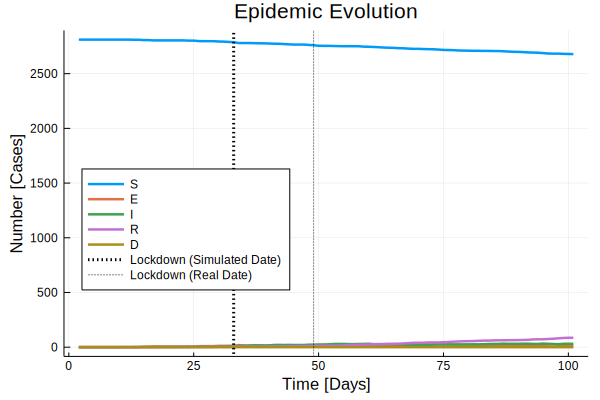

In [48]:
# Ensemble of susceptibles
f3=[quantile(gd[i].susceptible_status,0.05) for i in timestep]
m3=[quantile(gd[i].susceptible_status,0.5) for i in timestep] 
n3=[quantile(gd[i].susceptible_status,0.95) for i in timestep]
# Ensemble of exposed
f4=[quantile(gd[i].exposed_status,0.05) for i in timestep]
m4=[quantile(gd[i].exposed_status,0.5) for i in timestep] 
n4=[quantile(gd[i].exposed_status,0.95) for i in timestep]
# Ensemble of infected
f5=[quantile(gd[i].infected_presymptomatic_status+gd[i].infected_symptomatic_status+gd[i].infected_asymptomatic_status,0.05) for i in 2:length(gd)]
m5=[quantile(gd[i].infected_presymptomatic_status+gd[i].infected_symptomatic_status+gd[i].infected_asymptomatic_status,0.5) for i in 2:length(gd)] 
n5=[quantile(gd[i].infected_presymptomatic_status+gd[i].infected_symptomatic_status+gd[i].infected_asymptomatic_status,0.95) for i in 2:length(gd)]
# Ensemble of recovered
f6=[quantile(gd[i].recovered_status,0.05) for i in timestep]
m6=[quantile(gd[i].recovered_status,0.5) for i in timestep] 
n6=[quantile(gd[i].recovered_status,0.95) for i in timestep]
# Ensemble of died
f7=[quantile(gd[i].dead_status,0.05) for i in timestep]
m7=[quantile(gd[i].dead_status,0.5) for i in timestep] 
n7=[quantile(gd[i].dead_status,0.95) for i in timestep]

# Plot
plot(timestep, m3,
	label="S",
	xlabel="Time [Days]",
	ylabel="Number [Cases]",
	title="Epidemic Evolution", 
	legend=:left,
	lw=2.5; 
	ribbon=[m3-f3,n3-m3],
    fillalpha=0.3)
plot!(timestep, m4,label="E",lw=2.5; ribbon=[m4-f4,n4-m4],fillalpha=0.3)
plot!(timestep, m5,label="I",lw=2.5; ribbon=[m5-f5,n5-m5],fillalpha=0.3)
plot!(timestep, m6,label="R",lw=2.5; ribbon=[m6-f6,n6-m6],fillalpha=0.3)
plot!(timestep, m7,label="D",lw=2.5; ribbon=[m7-f7,n7-m7],fillalpha=0.3)
vline!(timestep, [22+11], line=(:dot,3), color="black", label="Lockdown (Simulated Date)")
vline!(timestep, [22+11+16], line=(:dot,1), color="black", label="Lockdown (Real Date)")

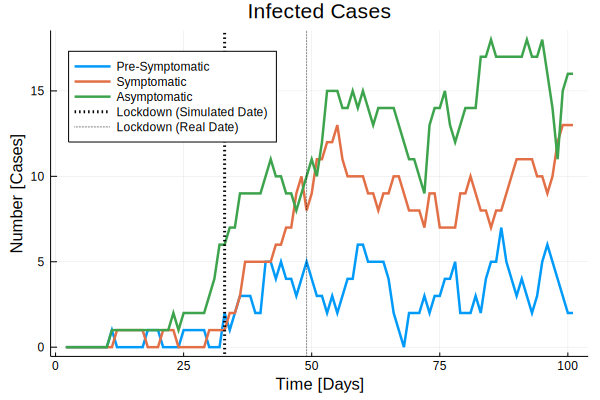

In [49]:
f8=[quantile(gd[i].infected_presymptomatic_status,0.05) for i in timestep]
m8=[quantile(gd[i].infected_presymptomatic_status,0.5) for i in timestep] 
n8=[quantile(gd[i].infected_presymptomatic_status,0.95) for i in timestep]
f9=[quantile(gd[i].infected_symptomatic_status,0.05) for i in timestep]
m9=[quantile(gd[i].infected_symptomatic_status,0.5) for i in timestep] 
n9=[quantile(gd[i].infected_symptomatic_status,0.95) for i in timestep]
f10=[quantile(gd[i].infected_asymptomatic_status,0.05) for i in timestep]
m10=[quantile(gd[i].infected_asymptomatic_status,0.5) for i in timestep] 
n10=[quantile(gd[i].infected_asymptomatic_status,0.95) for i in timestep]

plot(timestep, m8,
	label="Pre-Symptomatic",
	xlabel="Time [Days]",
	ylabel="Number [Cases]",
	title="Infected Cases", 
	legend=:topleft,
	lw=2.5; 
	ribbon=[m8-f8,n8-m8],
    fillalpha=0.3)
plot!(timestep, m9,label="Symptomatic",lw=2.5; ribbon=[m9-f9,n9-m9],fillalpha=0.3)
plot!(timestep, m10,label="Asymptomatic",lw=2.5; ribbon=[m10-f10,n10-m10],fillalpha=0.3)
vline!(timestep, [22+11], line=(:dot,3), color="black", label="Lockdown (Simulated Date)")
vline!(timestep, [22+11+16], line=(:dot,1), color="black", label="Lockdown (Real Date)")